# Heart Disease Prediction

* 로지스틱 회귀 연습

### 데이터 설명(출처: kaggle)

* Male: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* education
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
* Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

#### Predict variable (desired target)
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 불러오기

In [31]:
# 데이터 불러오기
heart= pd.read_csv('C:/Users/82102/Desktop/framingham_heart_disease.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [32]:
# 데이터 정보 확인
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# EDA 및 시각화

 “1” means “Yes”, “0” means “No”


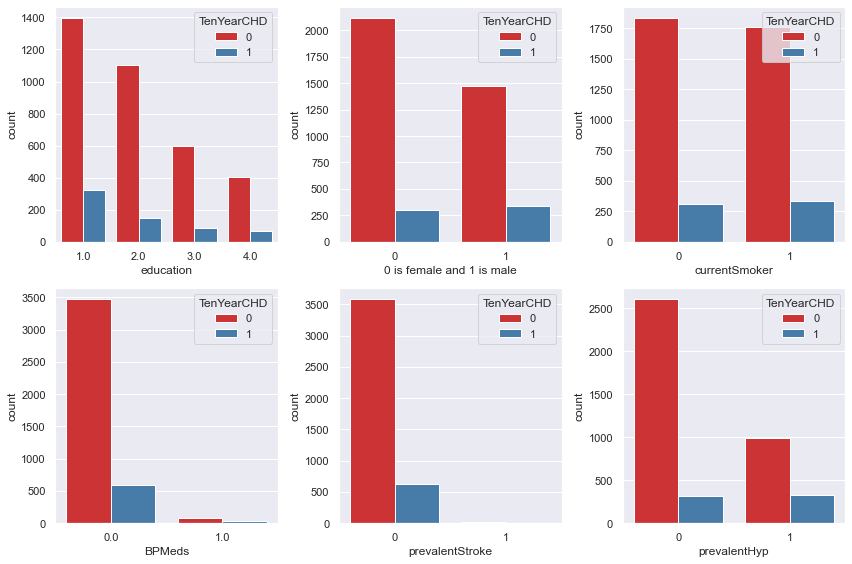

In [33]:
# 범주형 나눠지는 데이터에 대해 countplot
print(' “1” means “Yes”, “0” means “No”')
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(x="education", hue="TenYearCHD",data= heart,ax=axes[0,0])
sns.countplot(x="male", hue="TenYearCHD", data= heart, ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(x="currentSmoker", hue="TenYearCHD",data=heart,ax=axes[0,2])
sns.countplot(x="BPMeds",hue="TenYearCHD",data=heart,ax=axes[1,0])
sns.countplot(x="prevalentStroke",hue="TenYearCHD",data=heart,ax=axes[1,1])
sns.countplot(x="prevalentHyp",hue="TenYearCHD",data=heart,ax=axes[1,2])
plt.tight_layout()

* 교육수준이 낮을수록, 남성일때, 흡연자일 때, 혈압약 복용할 때, 과거 고혈압이 있을 경우 10년 내에 심장병이 발병할 확률이 높았다
* 과거 뇌졸증 경험은 대부분이 없어 확인하기 어려웠다

Distribution of continuous variables


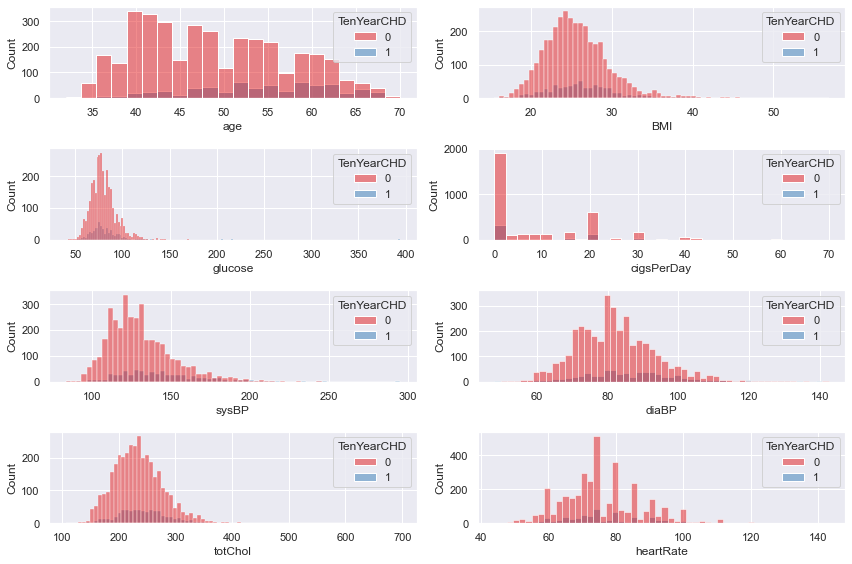

In [34]:
# 연속형 데이터에 대해 distplot
sns.set(style="darkgrid",palette='Set1')
print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))
sns.histplot(data = heart, x="age",hue='TenYearCHD', ax=axes[0,0])
sns.histplot(data = heart, x="BMI",hue='TenYearCHD',ax=axes[0,1])
sns.histplot(data = heart, x="glucose",hue='TenYearCHD',ax=axes[1,0])
sns.histplot(data = heart, x="cigsPerDay",hue='TenYearCHD',ax=axes[1,1])
sns.histplot(data = heart, x="sysBP",hue='TenYearCHD',ax=axes[2,0])
sns.histplot(data = heart, x="diaBP",hue='TenYearCHD',ax=axes[2,1])
sns.histplot(data = heart, x="totChol",hue='TenYearCHD',ax=axes[3,0])
sns.histplot(data = heart, x="heartRate",hue='TenYearCHD',ax=axes[3,1])
plt.tight_layout()

* 나이는 많아질수록 대체로 10년 이내에 심장병이 발병할 확률이 높았다
* BMI는 30근처일 때 확률이 높았다
* 수축기 혈압은 약 130미만까지 안전했다
* 이완기 혈압은 약 80~90 일 때 가장 안전했다
* 총 콜레스트롤 수치 200 후반부터 확률이 높았다

* 글루코스 수치와 하루 담배 개수와 심박수는 특별한 패턴을 발견하지는 못했다

# 전처리

#### 결측치 제거/대체

In [35]:
# 결측값 확인
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [36]:
heart_new.isnull().sum()

age                   0
cigsPerDay           29
diabetes              0
totChol               0
sysBP                 0
diaBP                 0
BMI                   0
heartRate             0
glucose               0
TenYearCHD            0
male_0                0
male_1                0
education_1.0         0
education_2.0         0
education_3.0         0
education_4.0         0
currentSmoker_0       0
currentSmoker_1       0
BPMeds_0.0            0
BPMeds_1.0            0
prevalentStroke_0     0
prevalentStroke_1     0
prevalentHyp_0        0
prevalentHyp_1        0
dtype: int64

In [37]:
# 정규분포 형태의 수치형 데이터는 평균으로 결측값 대체
heart_new = heart_new.fillna({'totChol': heart['totChol'].mean()})
heart_new = heart_new.fillna({'BMI': heart['BMI'].mean()})
heart_new = heart_new.fillna({'glucose': heart['glucose'].mean()})
heart_new = heart_new.fillna({'heartRate': heart['heartRate'].mean()})

* 0이 될 수는 없는 수치

In [38]:
# 정규분포 형태가 아닌 수치형 cigsPerDay 따로 살펴보기
cigs= heart[['cigsPerDay','TenYearCHD']]
cigs

,cigsPerDay,TenYearCHD
0,0.0,0
1,0.0,0
2,20.0,0
3,30.0,1
4,23.0,0
...,...,...
4233,1.0,1
4234,43.0,0
4235,20.0,0
4236,15.0,0


In [39]:
# TenYearCHD 가 0과 1에서 각각 cigsPerDay의 평균 구하기
cigs_df = pd.DataFrame(cigs)
cigs_df.groupby('TenYearCHD').agg(np.mean)

,cigsPerDay
TenYearCHD,
0,8.710401
1,10.629283


In [40]:
# TenYearCHD가 1일 때 평균
cigs1 = heart_new[heart_new['TenYearCHD']==1]
cigs1 = cigs1.fillna({'cigsPerDay': cigs1['cigsPerDay'].mean()})

In [41]:
# TenYearCHD가 0일 때 평균
cigs0 = heart_new[heart_new['TenYearCHD']== 0]
cigs0 = cigs0.fillna({'cigsPerDay': cigs1['cigsPerDay'].mean()})

In [42]:
# TenYearCHD가 1일 때, 0일 때 다시 합침
df_heart_new = pd.concat([cigs1, cigs0])
df_heart_new

,age,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,...,education_3.0,education_4.0,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1
3,61,30.0,0,225.0,150.0,95.0,28.58,65.0,103.000000,1,...,1,0,0,1,1,0,1,0,0,1
6,63,0.0,0,205.0,138.0,71.0,33.11,60.0,85.000000,1,...,0,0,1,0,1,0,1,0,1,0
15,38,20.0,0,221.0,140.0,90.0,21.35,95.0,70.000000,1,...,0,0,0,1,1,0,1,0,0,1
17,46,20.0,0,291.0,112.0,78.0,23.38,80.0,89.000000,1,...,0,0,0,1,1,0,1,0,1,0
25,47,20.0,0,294.0,102.0,68.0,24.18,62.0,66.000000,1,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,58,0.0,0,187.0,141.0,81.0,24.96,80.0,81.000000,0,...,1,0,1,0,1,0,1,0,0,1
4234,51,43.0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0,...,1,0,0,1,1,0,1,0,1,0
4235,48,20.0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,...,0,0,0,1,0,0,1,0,1,0
4236,44,15.0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0,...,0,0,0,1,1,0,1,0,1,0


In [43]:
# 남은 education은 0으로 대체
heart_new =heart_new.fillna(0)

In [44]:
# 범주형 변수는 원핫인코딩 진행
heart_new= pd.get_dummies(heart,columns=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp'])

In [45]:
heart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4238 non-null   int64  
 1   cigsPerDay         4209 non-null   float64
 2   diabetes           4238 non-null   int64  
 3   totChol            4188 non-null   float64
 4   sysBP              4238 non-null   float64
 5   diaBP              4238 non-null   float64
 6   BMI                4219 non-null   float64
 7   heartRate          4237 non-null   float64
 8   glucose            3850 non-null   float64
 9   TenYearCHD         4238 non-null   int64  
 10  male_0             4238 non-null   uint8  
 11  male_1             4238 non-null   uint8  
 12  education_1.0      4238 non-null   uint8  
 13  education_2.0      4238 non-null   uint8  
 14  education_3.0      4238 non-null   uint8  
 15  education_4.0      4238 non-null   uint8  
 16  currentSmoker_0    4238 

# 변수끼리 관계 살펴보기

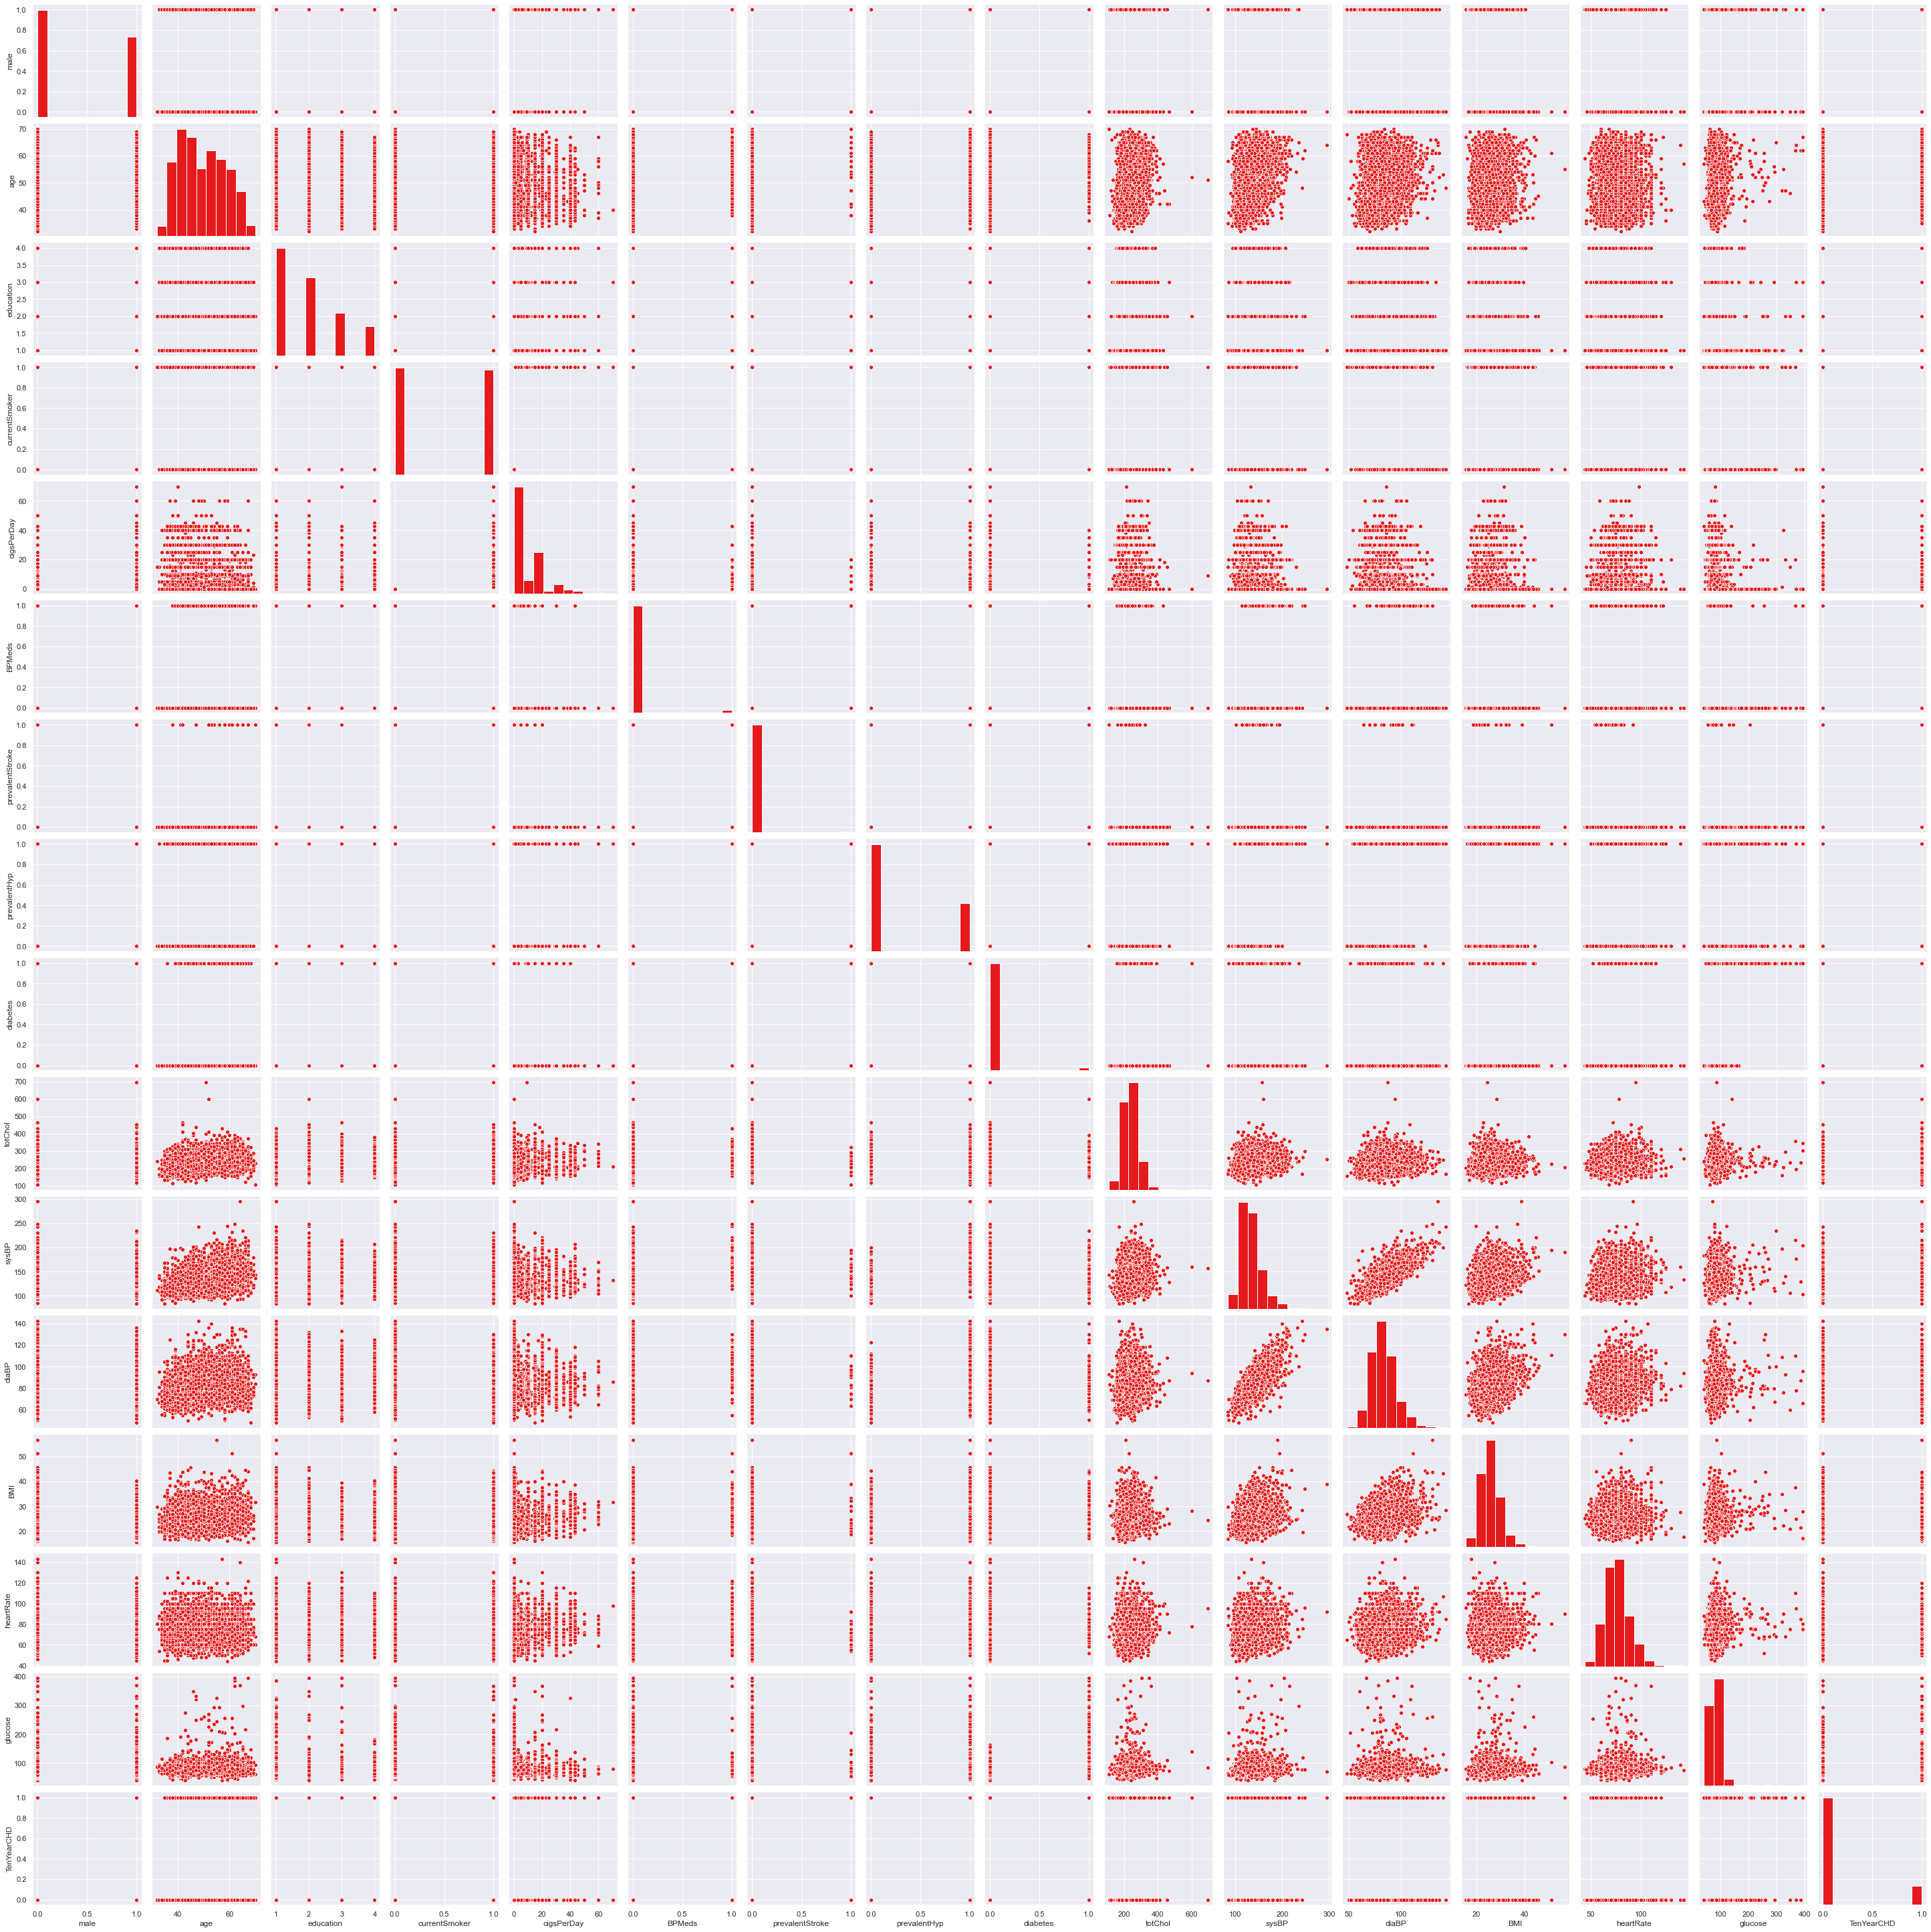

In [131]:
sns.pairplot(heart)

# 모델링

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [47]:
# 타깃데이터 설정: TenYearCHD
target = df_heart_new['TenYearCHD']
data = df_heart_new.drop(['TenYearCHD'],axis = 1, inplace=False)

In [48]:
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=156)

In [49]:
# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# 정확도와 roc_auc 측정
print('accuracy:{:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.847
roc_auc: 0.527


In [51]:
params = {'penalty': ['l2','l1'],
         'C':[0.01,0.1,1,1,5,10]}

# 그리드 서치를 통해 최적의 하이퍼 파라미터 찾기
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data, target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최적 하이퍼 파라미터:{'C': 10, 'penalty': 'l2'}, 최적 평균 정확도:0.851


C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 파라미터 C값을 좁혀가며 최적의 값 찾기

In [54]:
params = {'penalty': ['l2','l1'],
         'C':[8.5,8.89,9,9.5,10,10.5,11]}

# 그리드 서치를 통해 최적의 하이퍼 파라미터 찾기
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data, target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linea

최적 하이퍼 파라미터:{'C': 9, 'penalty': 'l2'}, 최적 평균 정확도:0.852


C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 최적 하이퍼 파라미터:{'C': 9, 'penalty': 'l2'}, 최적 평균 정확도:0.852